# Chpater 4.Representing Data and Engineering Features

 - So far, we assumed that our data comes in as a two-dimensional array of floating point numbers, where each column is a continuous feature that describes the data points.
 
 - For many applications, this is not how the data is collected. A particular common type of feature is categorical features, also known as discrete features, which are usually not numeric.
 
 - The distinction between categorical feature and continuous feature is analogous to the distinction between classification and regression only on the input side, not the output side.
 
 - Examples for continuous features that we saw are pixel brightnesses and size measurements of plant flowers.
 
 - Examples for categorical features are the brand of a product, the color of a product, or the department (books, clothing, hardware) it is sold in. These are all properties that can describe a product, but they don’t vary in a continuous way.
 
 - Regardless of the type of features your data consists of, how you represent them can have an enormous effect on the performance of machine learning models.
 
 - We saw in Chapter 2 and Chapter 3 that scaling of the data is important.
 
 - The question of how to represent your data best for a particular application is known as feature engineering, and it is one of the main tasks of data scientists and machine learning practitioners trying to solve real-world problems

## Categorical Variables 


- As an example, we will use the dataset of adult incomes in the United States, derived from the 1994 census database.

- The task of the adult dataset is to predict whether a worker has an income of over 50.000\$ or under 50.000\$


- The features in this dataset include the workers age, how they are employed (self employed, private industry employee, goverment employee, ...), their education, their gender, their working hours per week, occupation and more

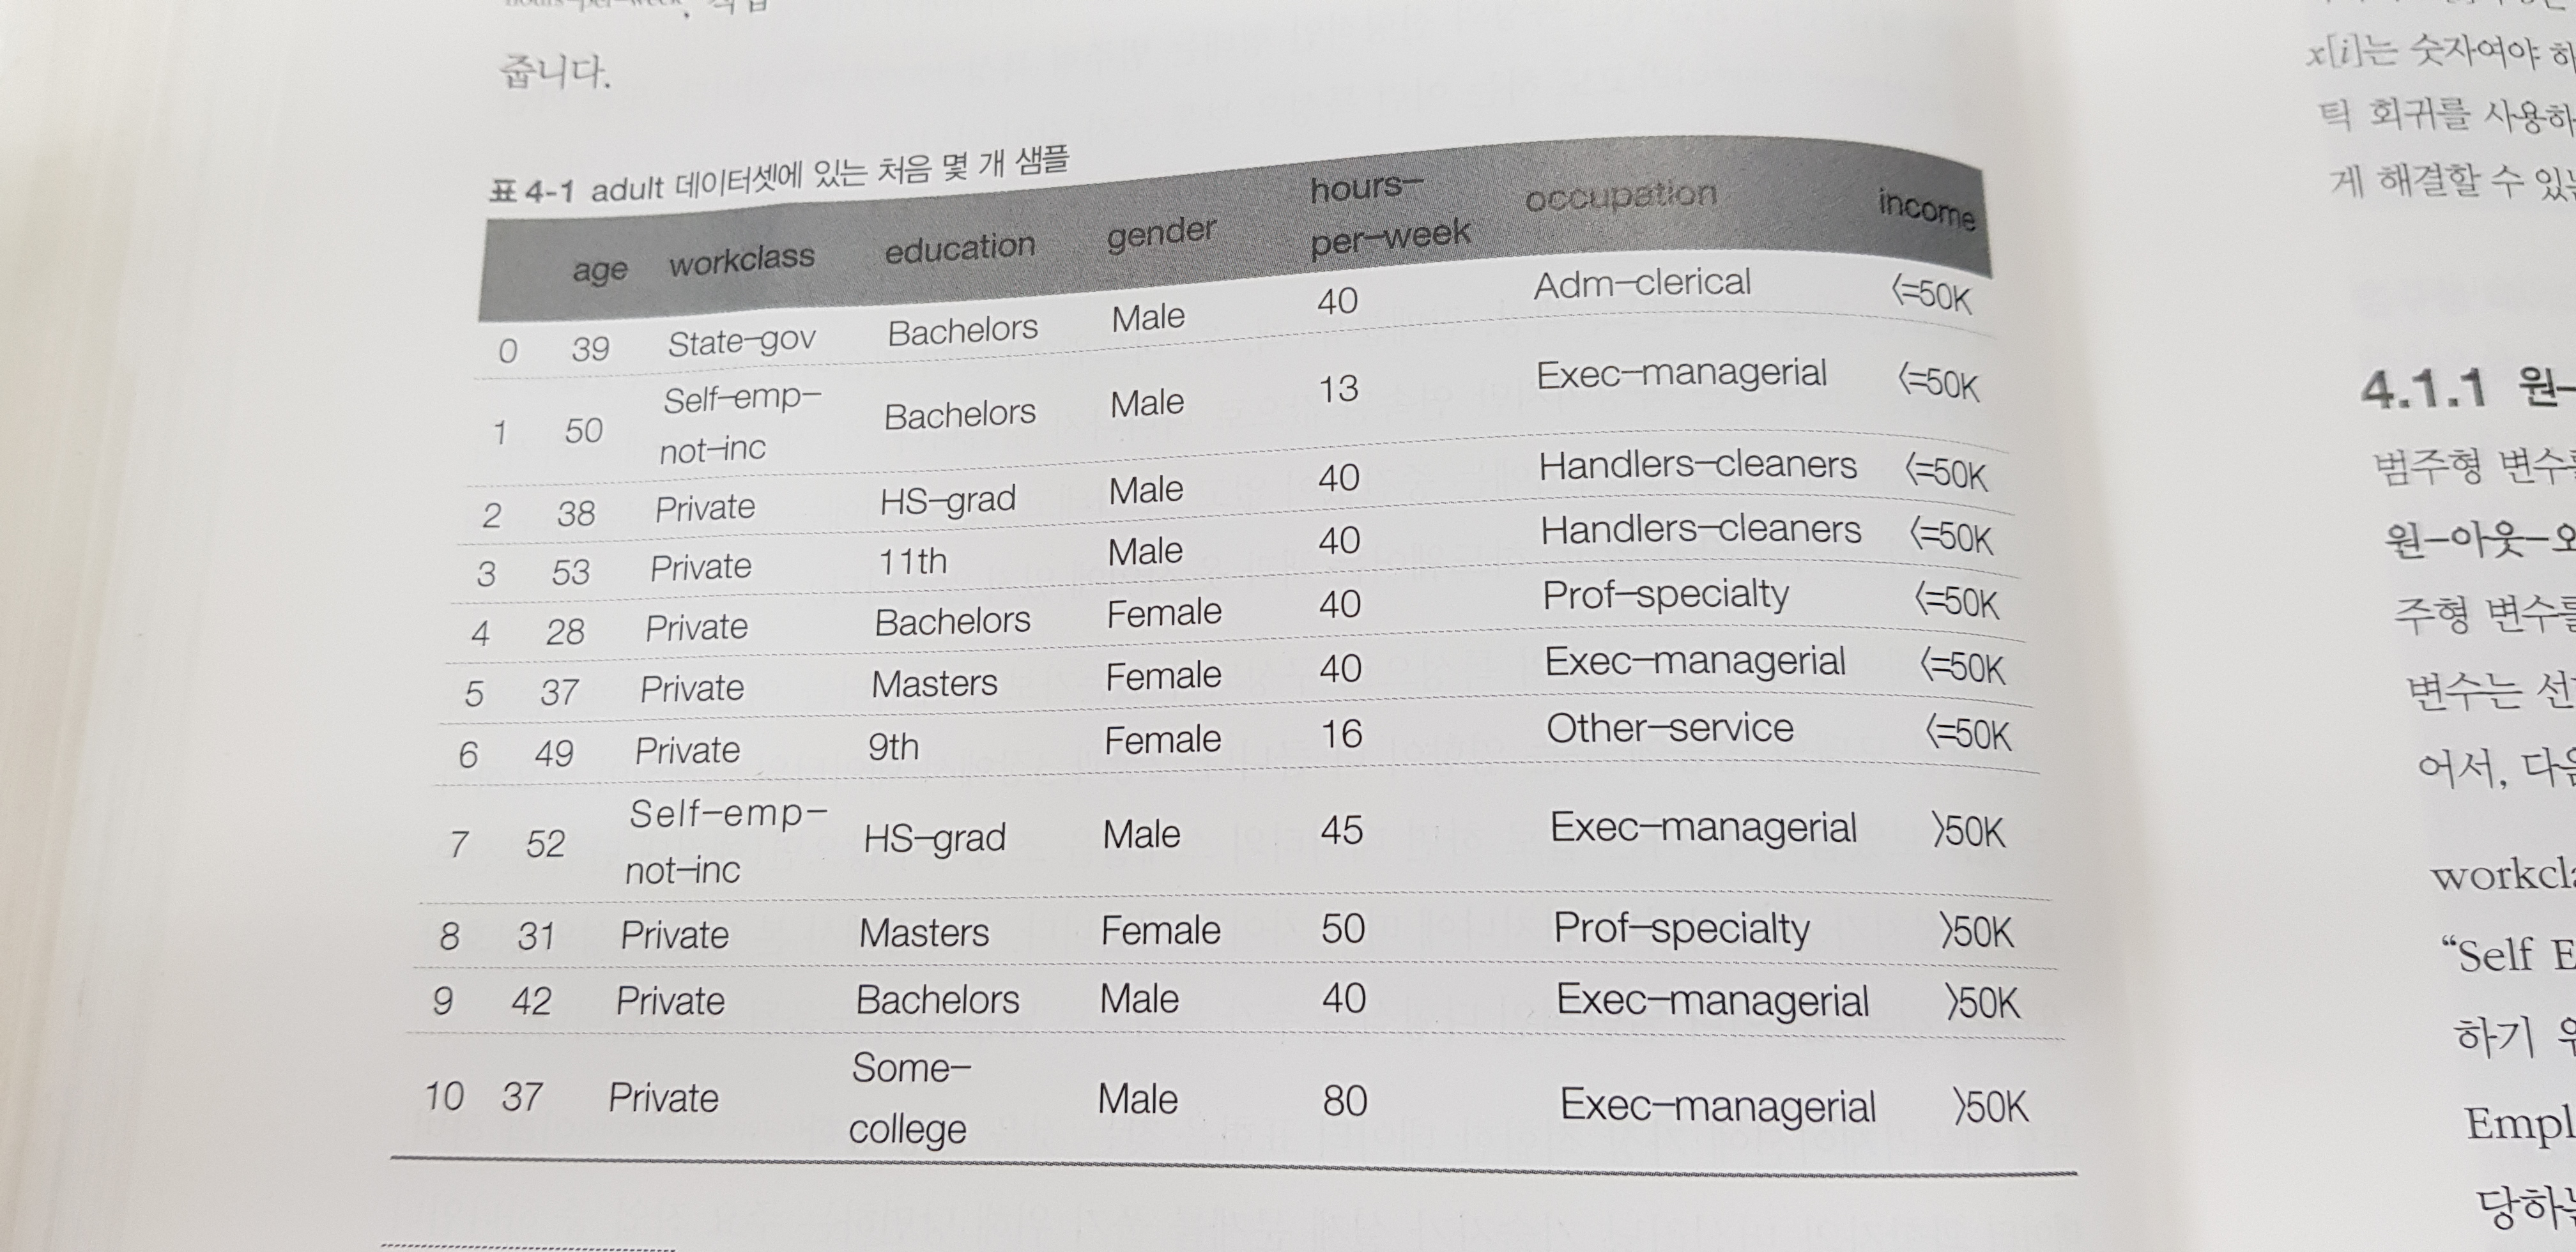

In [1]:
from IPython.display import Image 
Image(filename ='ADULT.JPG')

- The task is phrased as a classification task with the two classes being income <=50k and >50k

- In this dataset, age and hours-per-week are continuous features, which we know how to treat. The workclass, education, sex and ocupation features are categorical, however. All of them come from a fixed list of possible values, as opposed to a range, and denote a qualitative property, as opposed to a quantity.

- As a starting point, let’s say we want to learn a logistic regression classifier on this data. We know from Chapter 2 that a logistic regression makes predictions $\hat{y}$ using the formula

- \begin{align*} &\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b > 0 &\text{ (1) linear binary classification} \end{align*}

- where w[i] and b are coefficients learned from the training set and x[i] are the input features.

- This formula makes sense when x[i] are numbers, but not when x[2] is "Masters" or "Bachelors".

## One-Hot-Encoding (Dummy variables) 

- By far the most common way to represent categorical variables is using the one-hotencoding or one-out-of-N encoding, also known as dummy variables.

- The idea behind dummy variables is to replace a categorical variable with one or more new features that can have the values 0 and 1.

- The values 0 and 1 make sense in Formula (1) (and for all other models in scikit-learn), and we can represent any number of categories by introducing one new feature per category as follows.

- Let’s say for the workclass feature we have possible values of "Government Employee", "Private Employee", "Self Employed" and "Self Employed Incorporated". To encode this four possible values, we create four new features, called "Government Employee", "Private Employee", "Self Employed" and "Self Employed Incorporated". The feature is 1 if workclass for this person has the corresponding value, and 0 otherwise.

- So exactly one of the four new features will be 1 for each data point. This is why this is called one-hot or one-out-of-N encoding.

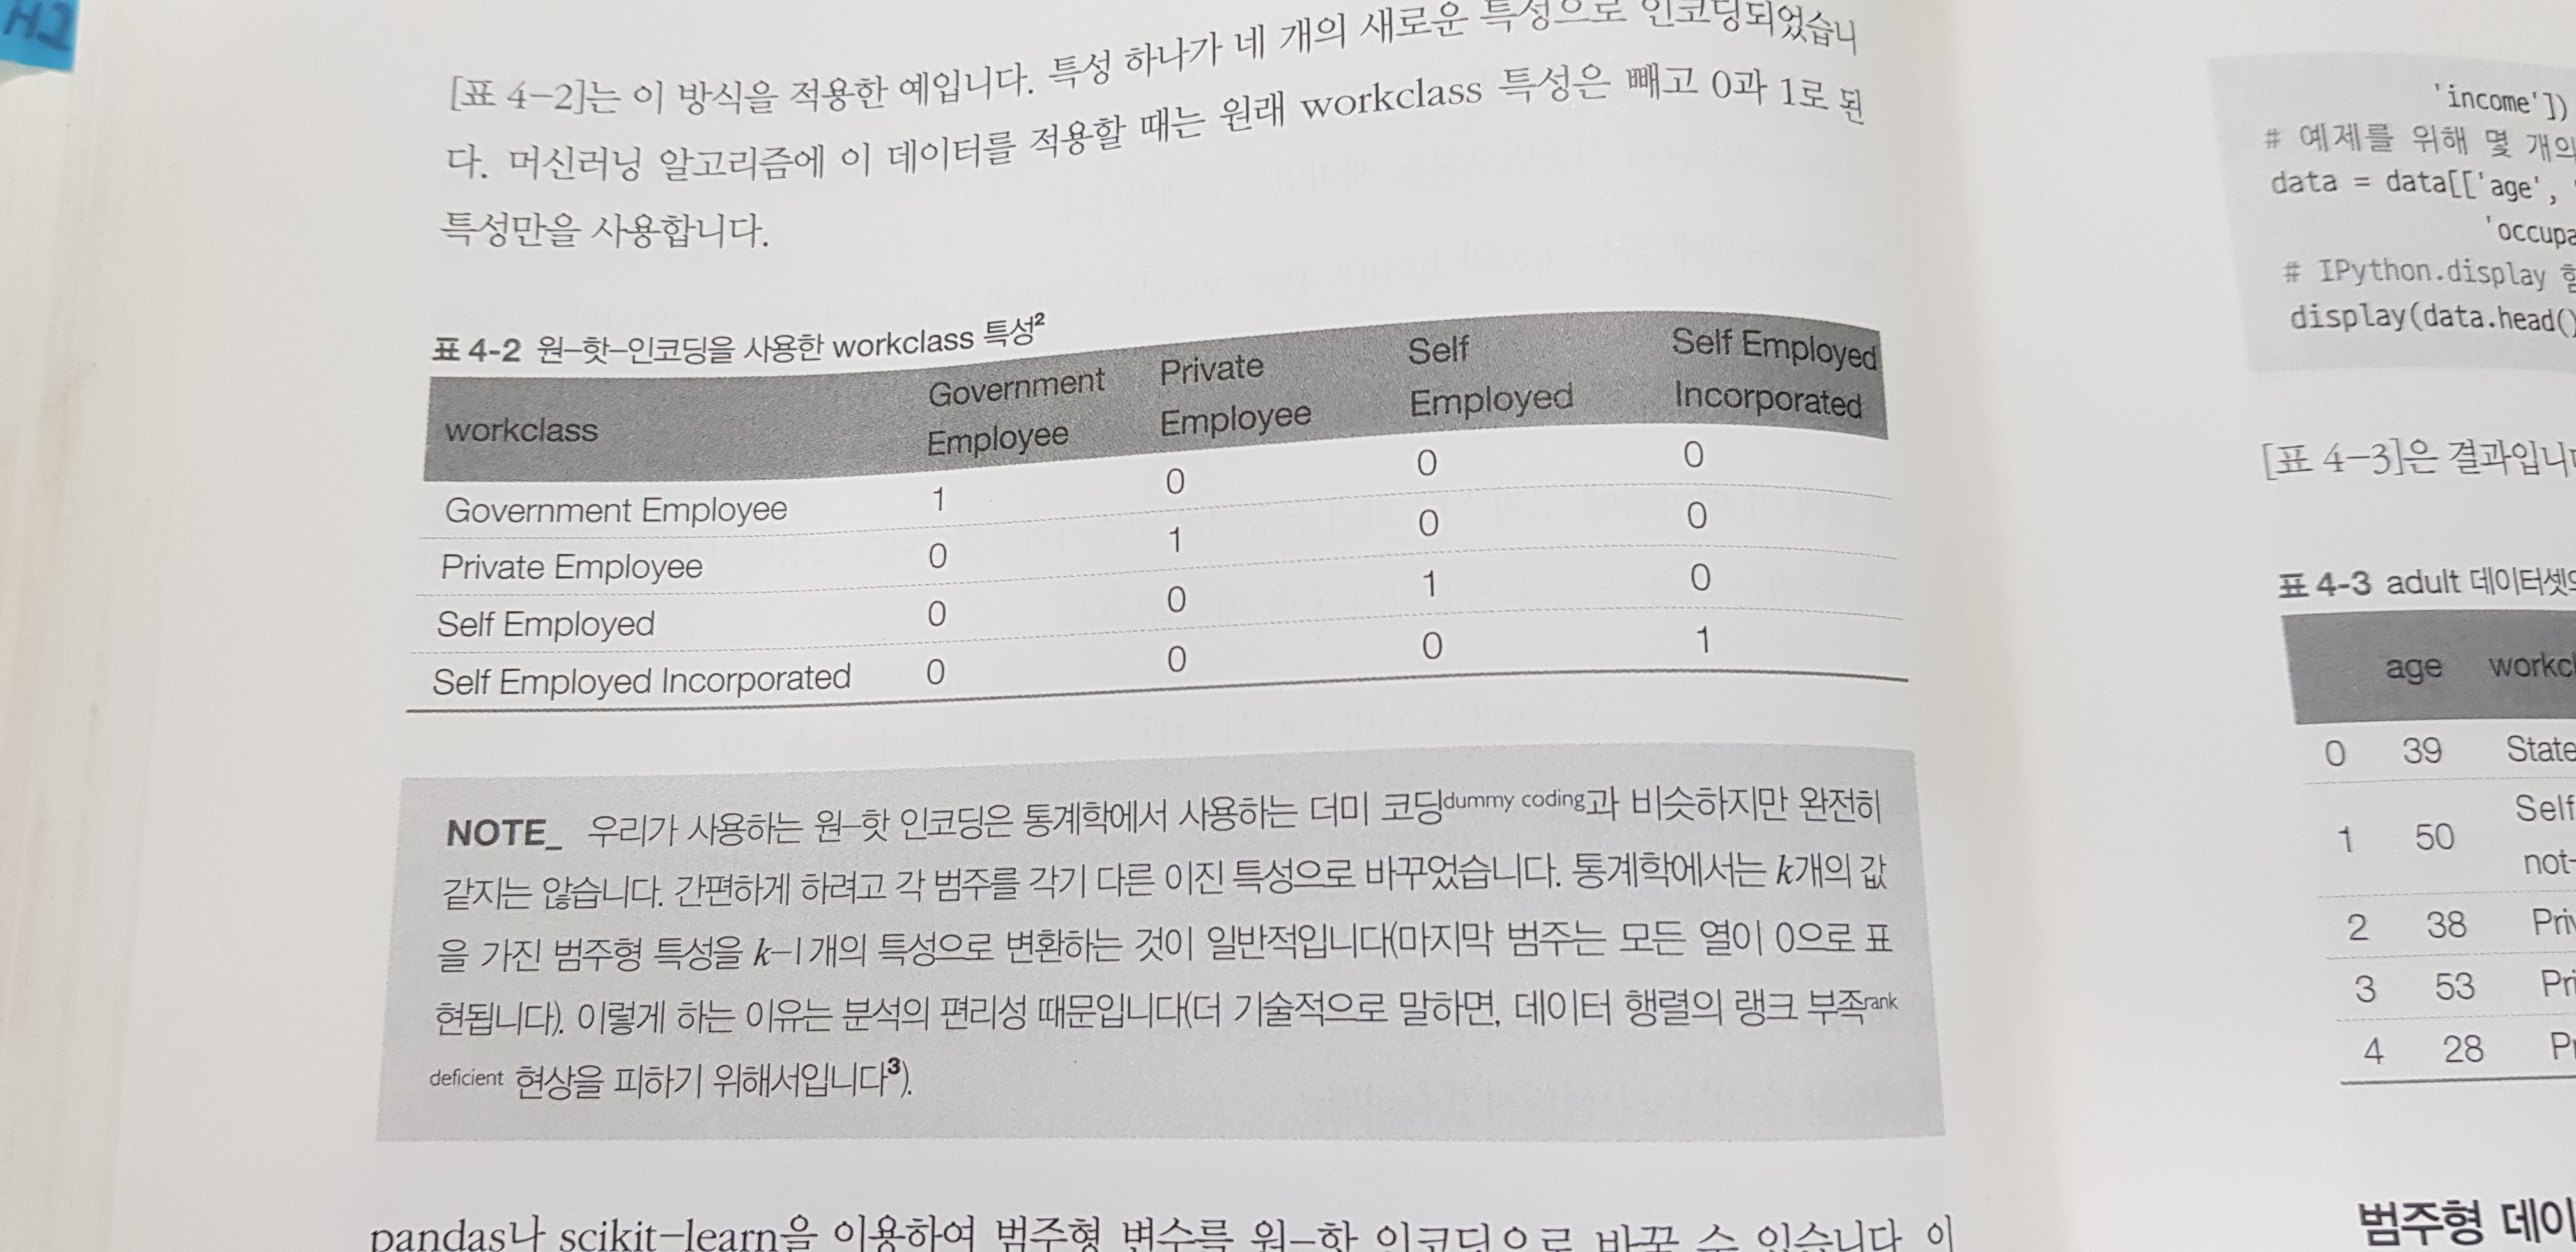

In [2]:
from IPython.display import Image 
Image(filename ='one.JPG')

- There are two ways to convert your data to a one-hot encoding of categorical variables, either using pandas or using scikit-learn. At the time of writing, using pandas for this setting is slightly easier, so let’s go this route. First we load the data using pandas from a comma seperated values (CSV) file:

In [3]:
import mglearn
import os
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

## Checking string-encoded categorical data

- After reading a dataset like this, it is often good to first check if a column actually contains meaningful categorical data.

- When working with data that was input by humans (say users on a website), there might not be a fixed set of categories, and differences in spelling and capitalization might require preprocessing.

- For example, it might be that some people specified gender as “male” and some as “man”, and we might want to represent these two inputs using the same category.

- A good way to check the contents of a column is using the value_counts function of a pandas series (the type of a single column in a dataframe), to show us what the unique values are, and how often they appear:

In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


- We can see that there are exactly two values for gender in this datasets, Male and Female, meaning the data is already in a good format to be represented using onehot- encoding.

- There is a very simple way to encode the data in pandas, using the get_dummies function:

In [5]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

- You can see that the continuous features age and hours-per-week were not touched, while the categorical features were expanded into one new feature for each possible value:

In [6]:
display(data_dummies.head())

age  hours-per-week  workclass_ ?  workclass_ Federal-gov  \
0   39              40             0                       0   
1   50              13             0                       0   
2   38              40             0                       0   
3   53              40             0                       0   
4   28              40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   

   ...  occupation_ Machine-op-inspct  occupation_ Other-service  \
0  ...                              0                          0   
1  ...                              0                          0   
2  ...                              0                          0   
3  ...                              0                          0   
4  ...                              0                          0   

   occupation_ Priv-house-serv  occupation_ Prof-specialty  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           1   

   occupation_ Protective-serv  occupation_ Sales  occupation_ Tech-support  \
0                            0                  0                         0   
1                            0                  0                         0   
2                            0                  0                         0   
3                            0                  0                         0   
4                            0                  0                         0   

   occupation_ Transport-moving  income_ <=50K  income_ >50K  
0                             0              1             0  
1                             0              1             0  
2                             0              1             0  
3                             0              1             0  
4                             0              1             0  

[5 rows x 46 columns]

- We can use the ``values`` attribute to convert the ``data_dummies`` dataframe into a numpy array, and then train a machine learning model on it.

- Be careful to separate the target variable (which is now encoded in two ``income`` columns) from the data before training a model.

- Including the output variable, or some derived property of the output variable, into the feature representation is a very common mistake in building supervised machine learning models.

[Warning box] Careful: column indexing in pandas includes
the end of the range, so ``'age’:'occupation_ Transport-moving'`` is inclusive of ``occupation_
Transport-moving``. This is in constrast to slicing a numpy array, where the end of
a range is not included: ``np.arange(11)[0:10]`` does not include the entry with index 10.
[/Warning box]

In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##  Numbers Can Encode Categoricals

- Numbers can encode categoricals In the example of the ``adult`` dataset, the categorical variables were encoded as strings.

- On the one hand, that opens up the possibility of spelling errors, but on the otherhand, it clearly marks a variable as categorical.

- Now the column contains number from 0 to eight, instead of strings like ``Private``, and looking at the table representing the dataset, it is not clear from the numbers whether we should treat this variable as continuous or categorical.

- Knowing that the numbers indicate employment status, it is clear that these are very distinct states, and should not be modelled by a single continuous variable

-[Warning box] Categorical features are often encoded using integers. That they are
numbers doesn’t mean that they should be treated as continuous features, as we mentioned
above. It is not always clear whether an integer feature should be treated as continuous
or discrete (and [one-hot-encoded). If there is no ordering between the semantics
that are encoded (like the ``workclass`` example above), the feature must be treated as
discrete. For other cases like 5-star ratings, the better encoding depends on the the particular
task and data and which machine learning algorithm is used.[/warning box]

- The ``get_dummies`` function in pandas treats all numbers as continuous and will not create dummy variables for them.

- To get around this, you can either use ``scikit-learn``’s``OneHotEncoder``, for which you can specify which variables are continuous and which are discrete, or convert numeric columns in the dataframe to strings.

In [9]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

Integer Feature Categorical Feature
0                0               socks
1                1                 fox
2                2               socks
3                1                 box

- Using get_dummies will only encode the string feature, and not change “Integer Feature”:

In [10]:
pd.get_dummies(demo_df)

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

- If you want dummy variables to be created for the “Integer Feature” column, one solution is to convert it to a string. Then, both features will be treated as categorical:

In [11]:
display(pd.get_dummies(demo_df))

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

In [12]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0

## Binning, Discretization, Linear Models and Trees

- The best way to represent data not only depends on the semantics of the data, but also on the kind of model you are using.

- Two large and very commonly used families of models are linear models and tree-based models (such as decision trees, gradient boosted trees and random forests).

- Let’s go back to the wave regression dataset that we used in chapter 2.

- It only has a single input feature. Here is a comparison of a linear regression model and a decision tree regressor on this dataset:

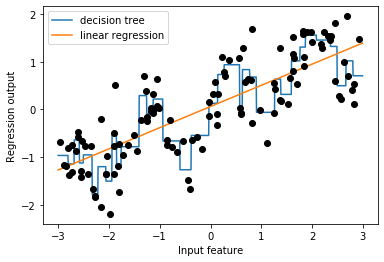

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- As you know, linear models can only model linear relationships, which are lines in the case of a single feature. The decision tree an build a much more complex model of the data.

- One way to make linear models more powerful on continuous data is to using binning (also known as discretization) of the feature to split it up into multiple features as follows:

- We imagine a partition of the input range of -3 to 3 of this feature into a fixed number of bins. Here, we pass bin boundaries from -3 to 3 with 11 equally sized steps.

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
bins = np.linspace(-3, 3, 11)
print("interval : {}".format(bins))

interval : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [17]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [18]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

- Here, the first bin contains all data points with feature values -3 to -2.4, the second bin contains all points feature values from -2.4 o -1.68 so on.

- Next, we record for each data point which bin it falls into. This can be easily computed using the np.digitize function:

In [19]:
which_bin = np.digitize(X, bins = bins)
print("\n data points: \n", X[:5])
print("\n data point inverval: \n", which_bin[:5])

print(X[:10])
X_binned.toarray()[:10]


 data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 data point inverval: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

- What we did here is transform the single continuous input feature in the wave dataset into a categorical feature which encodes which bin a data point is in.

- To use a scikitlearn model on this data, we transform this discrete feature to a one-hot encoding using the OneHotEncoder from the preprocessing module.

In [20]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


 - Because we specified 10 bins, the transformed dataset X_binned now is made up of 10 features:

In [21]:
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (120, 10)


Text(0.5, 0, 'Input feature')

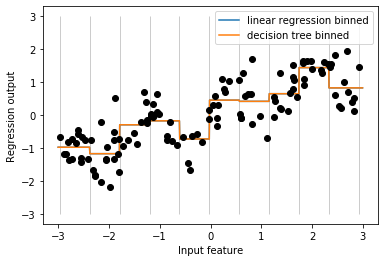

In [22]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- The green line and red line are exactly on top of each other, meaning the linear regression model and the decision tree make exactly the same predictions.

- For each bin, they predict a constant value.

- As features are constant within each bin, any model must predict the same value for all points within a bin.

- Comparing what the models learned before binning the features and after, we see that the linear model became much more flexible, because it now has a different value for each bin, while the decision tree model got much less flexible.

- Binning features generally has no beneficial effect for tree-based models, as the model can learn to split up the data anywhere.

- In a sense, that means the decision trees can learn a binning that is particularly beneficial for predicting on this data.


- If there are good reasons to use a linear model for a particular data set, say because it is very large and high-dimensional, but some features have non-linear relations with the output, binning can be a great way to increase modelling power.

# Interactions and Polynomials 

- Another way to enrich a feature representation, in particular for linear models, is adding interaction features and polynomial features of the original data.

- This kind of feature engineering is often used in statistical modelling, but also common in many practical machine learning applications.

- The linear model learned a constant value for each bin on the wave dataset. We know, however, that linear models can not only learn offsets, but also slopes.

- One way to add a slope to the linear model on the binned data, is to add the original feature (the x axis in the plot) back in.

(120, 11)


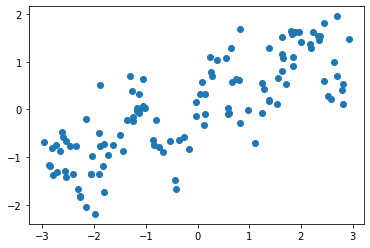

In [23]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
plt.plot(X[:, 0], y, 'o')

In [24]:
print(line.size)
print(line_binned.size)

1000
1000


In [27]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


In [30]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

ValueError: all the input arrays must have same number of dimensions

 - Now, the model learned an offset for each bin, together with a slope
 
 - The learned slope is downward, and shared across all the bins - there is the single x-axis feature which has a single slope.
 
 - This feature is a product of the bin-indicator and the original feature. Let’s create this dataset:

In [26]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


 - This dataset not has 20 features: the indicator for which bin a data point is in, and a product of the original feature and the bin indicator.

In [31]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

ValueError: dimension mismatch

 - As you can see, now each bin has its own offset and slope in this model.
 
 - Using binning is one way to expand a continuous feature. Another one is to use polynomials of the original features.
 
 - For a given feature x, we might want to consider x ** 2, x ** 3, x ** 4 and so on.
 
  - This is implemented in PolynomialFeatures in the preprocessing module:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

 - Using a degree of 10 yields 11 features, as by default, a constant feature (x ** 0) is added, too:

In [33]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 10)


In [34]:

print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [35]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


 - Using polynomial features together with a linear regression model yields the classical model of polynomial regression:

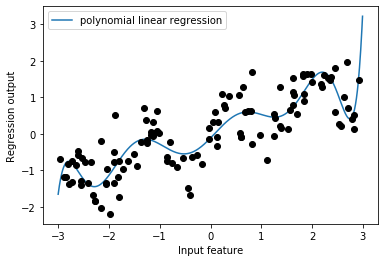

In [36]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

 - As you can see, polynomial feature yield a very smooth fit on this one-dimensional data. However, polynomials of high degree tend to behave in extreme ways on the boundaries or in regions of little data.
 
 - As a comparison, here is a kernel SVM model learned on the original data, without any transformation

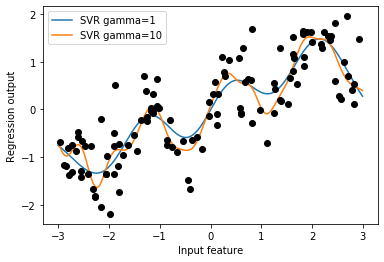

In [37]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

 - Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without using any transformations of the features.
 
 - As a more realistic application of interactions and polynomials, let’s look again at the Boston Housing data set. We already used polynomial features on this dataset in Chapter 2.
 
 - First we load the data, and rescale it to be between 0 and 1 using MinMaxScaler:

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 - Now, we extract polynomial features and interactions up to a degree of 2:

In [39]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


 - The data originally had 13 features, which were expanded into 105 interaction features. These new features represent all possible interactions between two different original features, as well as the square of each original feature. degree=2 here means that we look at all features that are the product of up to two original features.
 
 
 - The exact correspondence between input and output features can be found using the get_feature_names method:

In [40]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


 - The first new feature is a constant feature, called “1” here. The next 13 features are the original features (called “x0” to “x12”). Then follows the first feature squared (“x0^2”) and combinations of the first and the other features.
 
 - Let’s compare the performance using Ridge on the data with and without interactions:

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


 - Clearly the interactions and polynomial features gave us a good boost in performance when using Ridge. When using a more complex model like a random forest, the story is a bit different, though:

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.792
Score with interactions: 0.766


 - You can see that even without additional features, the random forest beats the performance of Ridge. Adding interactions and polynomials actually decreases performance slightly.

### Univariate Non-linear transformations

 - There are other transformations that often prove useful for transforming certain features, in particular applying mathematical functions like log, exp or sin.
 
 - While tree-based models only care about the ordering of the features, linear models and neural networks are very tied to the scale and distribution of each feature, and if there is a non-linear relation between the feature and the target, that becomes hard to model---in particular in regression.
 
 - The sin or cos functions can come in handy when dealing with data that encodes periodic patterns.
 
 - Most models work best when each feature (and in regression also the target) are loosely Gaussian distributed, that is a histogram of each feature should have something resembling the familiar bell-curve shape.
 
 - A particular common case when such a transformation can be helpful is when dealing with integer count data.
 
 - By count data, we mean features like “how often did user A log in”.Counts are never negative, and often follow particular statistical patterns.
 
 - We are using a synthetic dataset of counts here, that has properties similar to those you can find in the wild. The features are all integer, while the response is continuous:

In [43]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

 - Let’s look at the first ten entries of the first feature. All are integer and positive, but apart from that it’s hard to make out a particular pattern: If we count the appearance of each value, the distribution of values becomes more clear:

In [44]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


 - The value 2 seems to be the most common with 62 appearances (bincount always starts at 0), and the counts for higher values fall quickly. However, there are some very high values, like 134 appearing twice. We visualized the counts below:

Text(0.5, 0, 'Value')

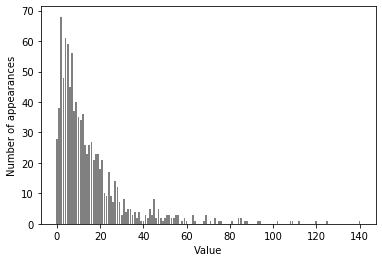

In [45]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

 - Features X[:, 1] and X[:, 2] have similar properties.
 
 - This kind of distribution of values (many small ones, and a few very large ones) is very common in practice
 
 - However, it is something most linear models can’t handle very well. Let’s try to fit a Ridge regression to this model:

In [46]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


 - pplying a logarithmic transformation can help, though. Because the value 0 appearsin the data (and the logarithm is not defined at 0), we can not actually just apply log,but we have to compute log(X + 1):

In [47]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

 - After the transformation, the distribution of the data is less asymmetrical and doesn’t have very large outliers any more:

Text(0.5, 0, 'Value')

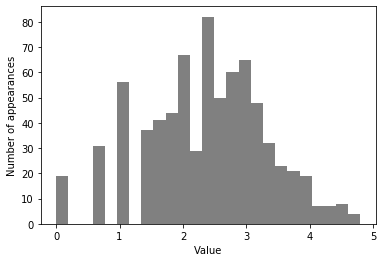

In [48]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

 - Building a ridge model on the new data provides a much better fit:

In [49]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


 - Finding the transformation that works best for each combination of dataset and model is somewhat of an art.
 
 - As we mentioned above, these kind of transformations are irrelevant for tree-based models, but might be essential for linear models.
 
 - As you saw in the examples above, binning, polynomials and interactions can have a huge influence on how models perform on a given dataset. This is in particularly true for less complex models like linear models and naive Bayes.

## Automatic Feature Selection

 - With so many ways to create new features, you might get tempted to increase the dimensionality of the data way beyond the number of original features. However, adding more features makes all models more complex, and so increases the chance of overfitting
 
 - When adding new features, or with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest. This can lead to simpler models that generalize better.
 
 - But how can you know how good each feature is?
 
 - There are three basic strategies: Univariate statistics, model-based selection and iterative selection.

### Univariate statistics

 - In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target.
 
 - Then the features that are related with the highest confidence are selected. In the case of classification, this is also known as analysis of variance (ANOVA).
 
 #### https://niceguy1575.tistory.com/51
 
  - A key property of these tests are that they are univariate meaning that they only consider each feature individually
  
  - Consequently a feature will be discarded if it is only informative when combined with another feature.
  
  - On the other hand, they are completely independend of the model that you might want to apply after the feature selection.
  
  - To use univariate feature selection in scikit-learn, you need to choose a test, usually either f_classif (the default) for classification or f_regression for regression, and a method to discard features based on the p-values determined in the test. 
  
  - All methods for discarding parameters use a threshold to discard all features with too high a pvalues (which means they are unlikely to be related to the target). 
  - The methods differ in how they compute this threshold, with the simplest ones being SelectKBest which selects a fixed number k of features, and SelectPercentile, which selectes a fixed percentage of features.
  
  ## http://vassarstats.net/textbook/ch14pt1.html 

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


 - As you can see, the number of features was reduced from 80 to 40 (50 percent of the original number of features). We can find out which features have been selected using the get_support method, which returns a boolean mask of the selected features:

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

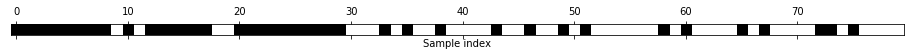

In [52]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

 - As you can see from the visualization of the mask above, most of the selected features are the original features, and most of the noise features were removed. However, the recovery of the original features is not perfect.

In [53]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 - Univariate feature selection can still be very helpful if there is such a large number of features that building a model on them is infeasible, or if you suspect that many features are completely uninformative.
 
 ### Model-based Feature Selection
 
  - Model based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones.
  
  - The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling.
  
  - The model that is used for feature selection needs to provide some measure of importance for each feature, so that they can be ranked by this measure.
  
  - Decision trees and decision tree based models provide feature importances, which can be used; Linear models have coefficients which can be used by considering the absolute value
  
  - As we saw in Chapter 2, linear models with L1 penalty learn sparse coefficients, which only use a small subset of features.
  
  - In contrast to univariate selection, model-based selection considers all features at once, and so can capture interactions (if the model can capture them).

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

 - The SelectFromModel class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold.
 
 - To get a comparable result to what we got with univariate feature selection, we used the median as a threshold, so that half of the features will be selected.
 
  - We use a random forest classifier with 100 trees to compute the feature importances. This is a quite complex model and much more powerful than using univariate tests

In [55]:

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

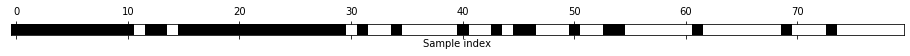

In [56]:

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

 - This time, all but two of the original features were selected. Because we specified to select 40 features, some of the noise features are also selected.

In [57]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Iterative feature selection

 - In iterative feature selection, a series of models is built, with varying numbers of features.
 
 - There are two basic methods: starting with no features and adding features one by one, until some stopping criterion is reached, or starting with all features and removing features one by one, until some stopping criterion is reached.
 
 - Because a series of models is built, these methods are much more computationally expensive then the methods we discussed above
 
 - One particular method of this kind is recursive feature elimination (RFE) which starts with all features, builds a model, and discards the least important feature according to the model.
 
 - Then, a new model is built, using all but the discarded feature, and so on, until only a pre-specified number of features is left.
 
 - For this to work, the model used for selection needs to provide some way to determine feature importance, as was the case for the model based selction.

([], <a list of 0 Text yticklabel objects>)

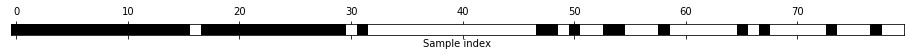

In [58]:

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

 - The feature selection got better compared to the univariate and model based selection, but one feature was still missed.
 
 - Running the above code takes significantly longer than the model based selection, because a random forest model is trained 40 times, once for each feature that is dropped.

In [59]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 - We can also use the model used inside the RFE to make predictions. This uses only the feature set that was selected:

In [60]:

print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


 - It is also great to reduce the amount of features needed, for example to speed up prediction, or allow for more interpretable models.
 
 ### Utilizing Expert Knowledge
 
 - Feature engineering is often an important place to use expert knowledge for a particular application.
 
 - Often, domain experts can help in identifying useful features that are much more informative than the initial representation of the data.
 
  - In this way, prior knowledge about the nature of the task can be encoded in the features to aid a machine learning algorithm
  
  - We’ll now go through one particular case of using expert knowledge - though in this case is might be more rightfully called “common sense”. The task is predicting citibike rentals in front of Andreas’ house.
  
  - In New York, there is a network of bicycle rental stations, with a subscription system. The stations are all over the city and provide a convenient way to get around. Bike rental data is made public in an anonymized form
  
  - The task we want to solve is to predict for a given time and day how many people will rent a bike in front of Andreas’ house - so he knows if any bikes will be left for him.
  
  
  
  - We first load the data for August 2015 of this particular station as a pandas dataframe. We resampled the data into 3 hour intervals to obtain the main trends for each day.

In [61]:
citibike = mglearn.datasets.load_citibike()

In [62]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Below is a visualization of the rental frequencies for the whole month:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rentals')

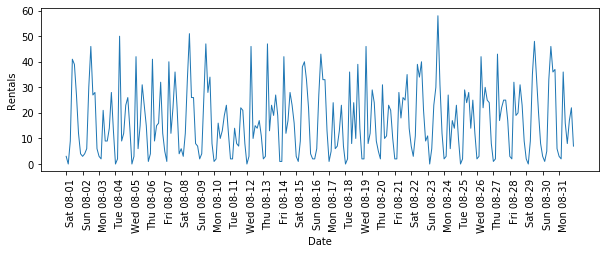

In [63]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

 - Looking at the data, we can clearly distinguish day and night for each day. The patterns for week days and weekends also seem to be quite different.
 - When evaluating a prediction task on a time series like this, we usually want to learn from the past and predict for the future.
 
 - This means when doing a split into a training and a test set, we want to use all the data up to a certain date as training set, and all the data past that date as a test set
 
  - We will use the first 184 data points, corresponding to the first 23 days, as our training set, and the remaining 64 data points corresponding to the remaining 8 days as our test set.

In [64]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

We first define a function to split the data into training and test set, build the model, and visualize the result

In [65]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

 - We saw above that random forests need very little preprocessing of the data, which makes it seem like a good model to start with.

Test-set R^2: -0.04


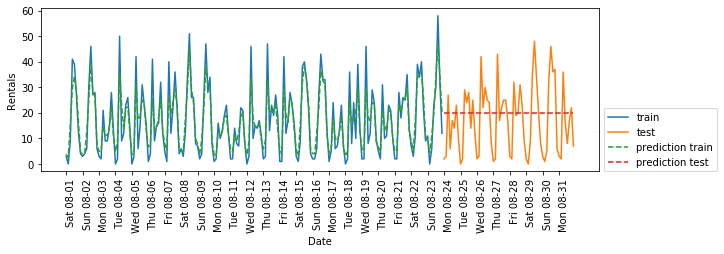

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

 - The predictions on the training set are quite good, as is usual for random forests.


 - However, for the test set, a constant line is predicted. The R^2 is -0.04, which means that we learned nothing. What happened?
 
 
 - The problem lies in the combination of our feature and the random forest. The value of the POSIX time feature for the test set is outside of the range of the feature values on the training set: the points in the test set have time stamps that are later than all the points in the training set.
 
 - Trees, and therefore random forests, can not extrapolate to feature ranges outside the training set.
 
 - The result is that the model simply predicts the same as for the closest point in the training set - which is the last time it observed any data.
 
 - Clearly we can do better than this. This is where our “expert knowledge” comes in. From looking at the rental figures on the training data, two factors seem to be very important: the time of day, and the day of the week.

Test-set R^2: 0.60


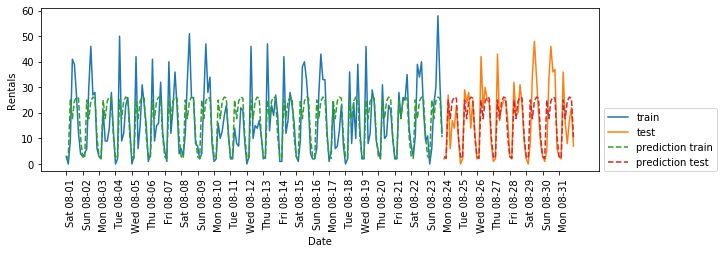

In [67]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

 - Now the predictions have the same pattern for each day of the week. The $R^2$ is already much better, but the predictions clearly miss the weekly pattern. Now let’s also add the day of the week:

Test-set R^2: 0.84


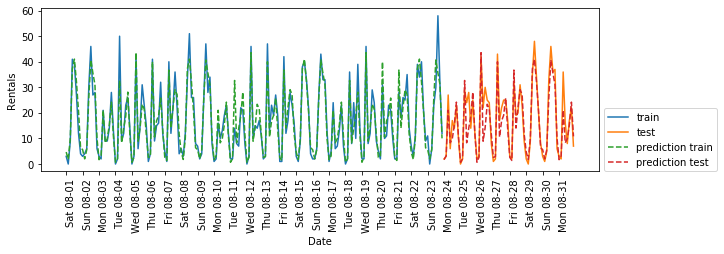

In [68]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

 - What this model likely is learning is the mean number of rentals for each combination of weekday and time of day from the first 23 days of August. 
 - This would actually not require a complex model like a random forest.

 - So let’s try with a simpler model, LinearRegression:

Test-set R^2: 0.13


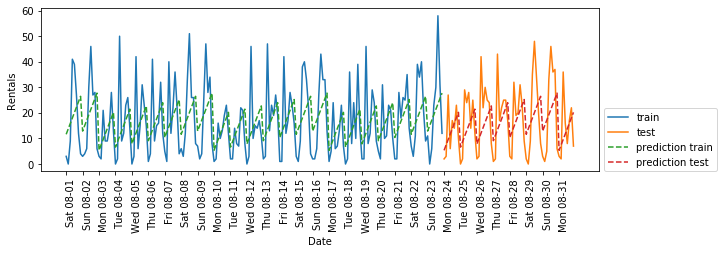

In [69]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

 - Linear Regression works much worse, and the periodic pattern looks odd. The reason for this is that we encoded day of the week and time of the day using integers, which are interpreted as categorical variables.
 
 - Therefore, the linear model can only learn a linear function of the time of day - and it learned that later in the day, there are more rentals.
 
 - However, the patterns are much more complex that that, which we can capture by interpreting the integers as categorical variables, by transforming them using OneHotEncoder:

In [70]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set R^2: 0.62


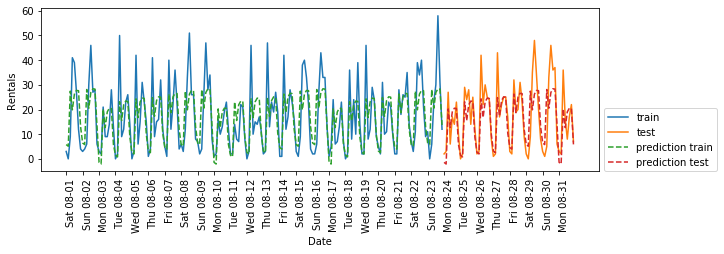

In [72]:
eval_on_features(X_hour_week_onehot, y, Ridge())

 - This gave us a much better match than the continuous feature encoding
 
 - Now, the linear model learns one coefficient for each day of the week, and one coefficient for each time of the day. That means that the “time of day” pattern is shared over all days of the week, though.
 
 
  - Using interaction features, we can allow the model to learn one coefficient for each combination of day and time of day:

Test-set R^2: 0.85


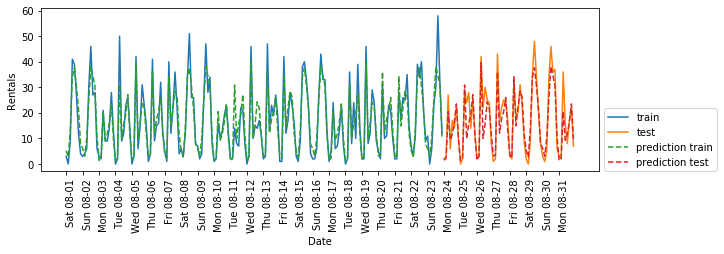

In [73]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

 - This transformation finally yields a model that performs similarly well to the random forest.
 
 - A big benefit of this model is that it is very clear what is learned: one coefficient for each day and time.
 
 - We can simply plot the coefficients learned by the model, something that would not be possible for the random forest.
 
 - First, we create feature names for the hour and day features:

In [74]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

 - Then we name all the interaction feature extracted by the PolynomialFeatures, using the get_feature_names method, and keep only the feature with non-zero coefficients:

In [75]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Now we can visualize the coefficients learned by the linear model:

Text(0, 0.5, 'Feature magnitude')

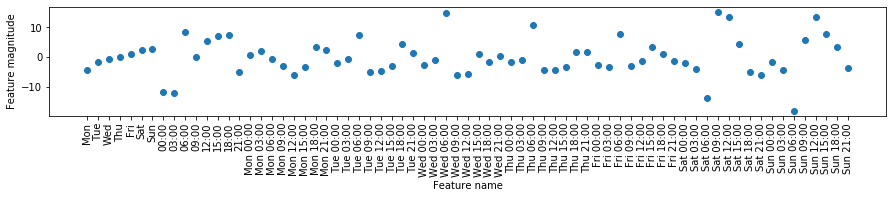

In [76]:

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

### Summary and outlook

 - In this chapter, we discussed how to deal with different data types, in particular with categorical variables.

 - We emphasized the importance of representing your data in a way that is suitable for the machine learning algorithm, for example by one-hot-encoding categorical variables.
 
 - We also discussed the importance of engineering new features, and the possibility of utilizing expert knowledge in creating derived features from your data.
 
 - In particular linear models might benefit greatly from generating new features via binning and adding polynomials and interactions, while more complex, nonlinear models like random forests and SVMs might be able to learn more complex tasks without explicitly expanding the feature space.